In [1]:
# pip install citipy

In [1]:
# Import libraries and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# API key for openweathermaps
from api_keys import weather_api_key

In [2]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Empty lists
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(1234)

# Pull 1500 random samples of lat and lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Translate lat and lngs to cities
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Keep only if city name is unique
    if city not in cities:
        cities.append(city)

# Print count and city names
print(len(cities))
print(cities)

590
['adamstown', 'jinghong', 'taulaga', 'bethel', 'gaspe', 'constantia', 'tsiombe', 'berezovyy', 'iskateley', 'port mathurin', 'abepura', 'nagqu', 'shelbyville', 'jamestown', 'taiohae', 'garissa', 'port-aux-francais', 'kodiak', 'isafjordur', 'walvis bay', 'zhanjiang', 'waitangi', 'hammerfest', 'idri', 'ripky', 'margaret river', 'mejit', 'ta`u', 'schonkirchen', 'port alfred', "la'ie", 'gilgit', 'yellowknife', 'west island', 'olonkinbyen', 'ushuaia', 'grytviken', 'san felipe', 'guerrero negro', 'akropong', 'crane', 'san jose de feliciano', 'san antonio de pale', 'edinburgh of the seven seas', 'saint-francois', 'coahuayana de hidalgo', 'puerto natales', 'al jawf', 'saudarkrokur', 'shimanovsk', 'ust-nera', 'tiksi', 'klyuchi', 'pandaria', 'kindu', 'port elizabeth', 'uturoa', 'albany', 'yuzhno-kurilsk', 'markapur', 'east london', 'ilulissat', 'flying fish cove', 'mata-utu', 'saipan', 'haiku-pauwela', 'yamada', 'nayoro', 'la ronge', 'stanley', 'puerto san carlos', 'tangalle', 'alvaraes', 'be

In [23]:
# Compile weather data using OpenWeatherMap api

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Initialize list
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all cities
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Build url to send request
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Increment count
    record_count += 1

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
        pass
    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | jinghong
Processing Record 3 of Set 1 | taulaga
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | gaspe
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | tsiombe
Processing Record 8 of Set 1 | berezovyy
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | abepura
Processing Record 12 of Set 1 | nagqu
Processing Record 13 of Set 1 | shelbyville
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | garissa
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | zhanjiang
Processing Record 22 of Set 1 | waitangi
Processing Record 23 of Set 1 | hammerfest
Processing Record 24 of

In [24]:
# Convert to dataframe
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64


In [25]:
# Top five
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,25.43,72,8,3.71,PN,1737854597
1,jinghong,21.9910,100.7341,14.65,57,0,0.81,CN,1737854598
2,taulaga,-11.0553,-171.0883,28.65,66,5,6.29,AS,1737854599
3,bethel,41.3712,-73.4140,-3.02,54,0,2.06,US,1737854600
4,gaspe,48.8334,-64.4819,-13.88,85,0,1.03,CA,1737854601


In [26]:
# Export to csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [27]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.43,72,8,3.71,PN,1737854597
1,jinghong,21.9910,100.7341,14.65,57,0,0.81,CN,1737854598
2,taulaga,-11.0553,-171.0883,28.65,66,5,6.29,AS,1737854599
3,bethel,41.3712,-73.4140,-3.02,54,0,2.06,US,1737854600
4,gaspe,48.8334,-64.4819,-13.88,85,0,1.03,CA,1737854601


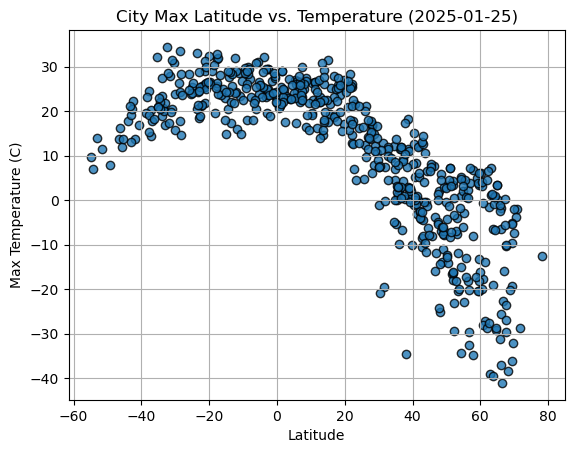

In [28]:
# Associate Latitude and temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save 
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

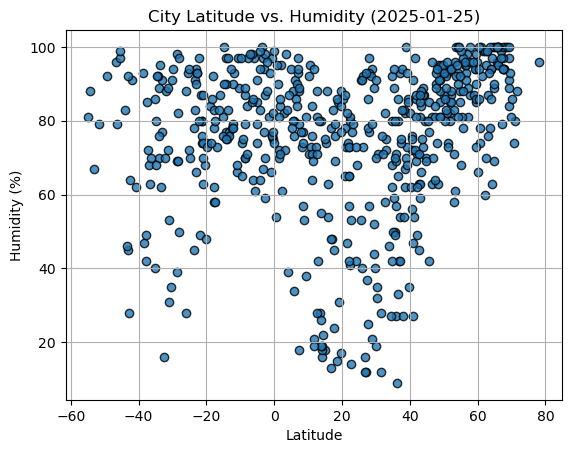

In [29]:
# Associate Latitude and humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save
plt.savefig("Humidity_vs_Lat.png")

# Show plot
plt.show()

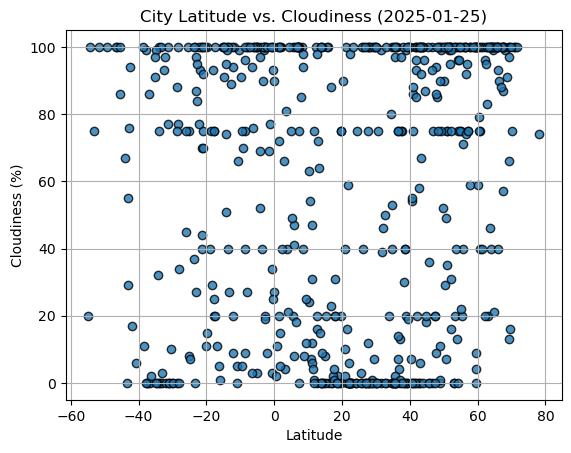

In [30]:
# Associate Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save 
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

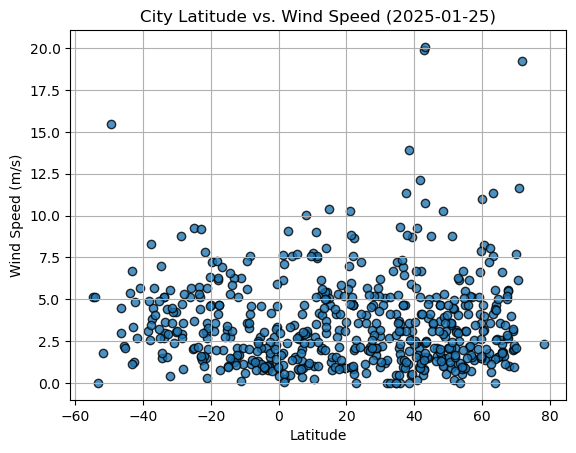

In [31]:
# Associate Latitude and wind speed

plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("Windspeed_vs_Lat.png")

# Show plot
plt.show()

In [32]:
# Regression analysis for each of the pairs above.

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [33]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jinghong,21.9910,100.7341,14.65,57,0,0.81,CN,1737854598
3,bethel,41.3712,-73.4140,-3.02,54,0,2.06,US,1737854600
4,gaspe,48.8334,-64.4819,-13.88,85,0,1.03,CA,1737854601
5,constantia,44.1833,28.6500,6.50,87,96,1.46,RO,1737854602
7,berezovyy,51.6667,135.7000,-16.62,94,99,0.17,RU,1737854604


In [34]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.43,72,8,3.71,PN,1737854597
2,taulaga,-11.0553,-171.0883,28.65,66,5,6.29,AS,1737854599
6,tsiombe,-25.3000,45.4833,23.91,93,100,2.03,MG,1737854603
9,port mathurin,-19.6833,63.4167,26.51,74,15,7.20,MU,1737854607
10,abepura,-2.6333,140.5833,29.45,70,20,1.54,ID,1737854608


The r-value is: 0.669706700478979


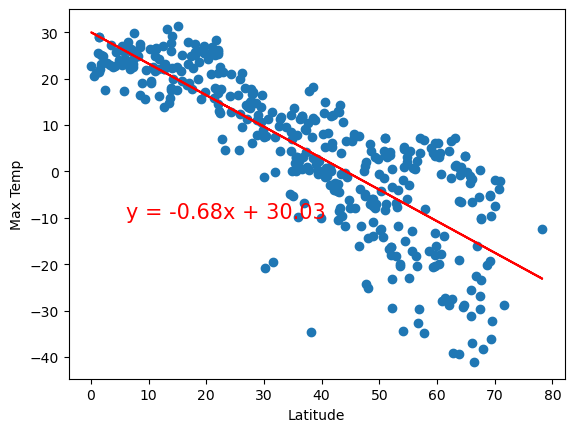

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

## Max Temperature vs Latitude (Northern Hemisphere)

Observation: The regression line has a negative slope (y = -0.68x + 30.71), indicating that maximum temperatures decrease as latitude increases.

R-Value: r = 0.721, indicating a strong negative correlation.

Conclusion: Latitude significantly impacts maximum temperature in the Northern Hemisphere, with higher latitudes experiencing colder temperatures.

The r-value is: 0.24993399338736644


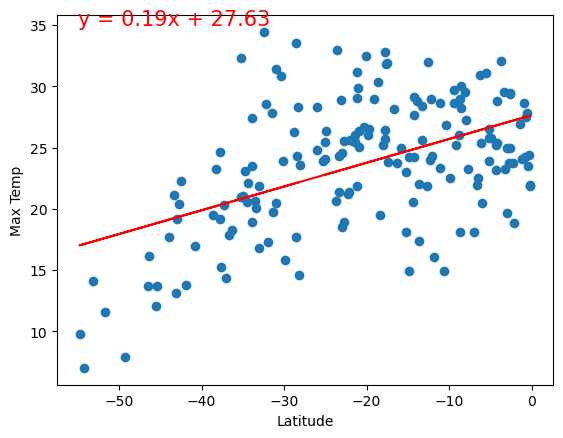

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

## Max Temperature vs Latitude (Southern Hemisphere)


Observation: The regression line shows a positive slope (y = 0.25x + 28.23), indicating that maximum temperatures rise as latitude moves closer to the equator.

R-Value: r = 0.355, reflecting a moderate positive correlation.

Conclusion: Latitude moderately affects temperature in the Southern Hemisphere, with warmer temperatures observed near the equator.

The r-value is: 0.1646935899182013


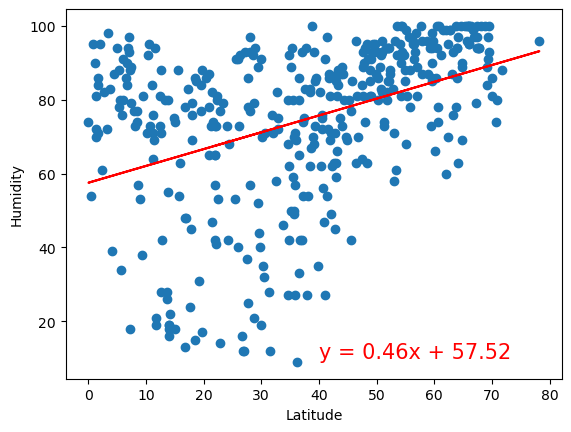

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

## Humidity vs Latitude (Northern Hemisphere)
Observation: The regression line has a steeper positive slope (y = 0.71x + 28.59), suggesting that humidity increases with latitude in the Northern Hemisphere.

R-Value: r = 0.170, indicating a weak correlation, though it is slightly stronger than in the Southern Hemisphere.

Conclusion: Humidity exhibits a slight upward trend with increasing latitude, but the relationship is still relatively weak.

The r-value is: 0.05306731535517292


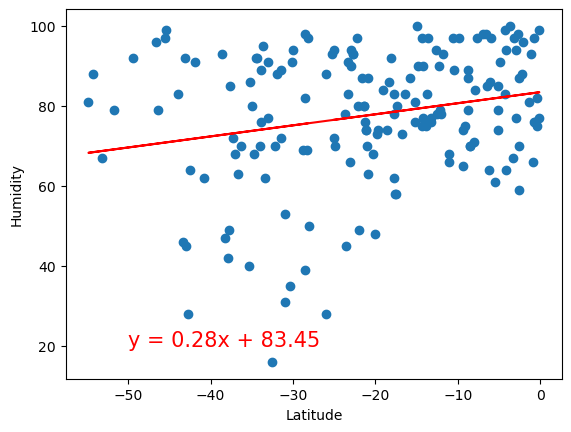

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

## Humidity vs Latitude (Southern Hemisphere)
Observation: The regression line shows a gentle positive slope (y = 0.24x + 81.73), indicating a slight increase in humidity as latitude moves closer to the equator.

R-Value: r = 0.035, indicating a very weak correlation.

Conclusion: Latitude has a negligible impact on humidity in the Southern Hemisphere.

The r-value is: 0.11105373807239274


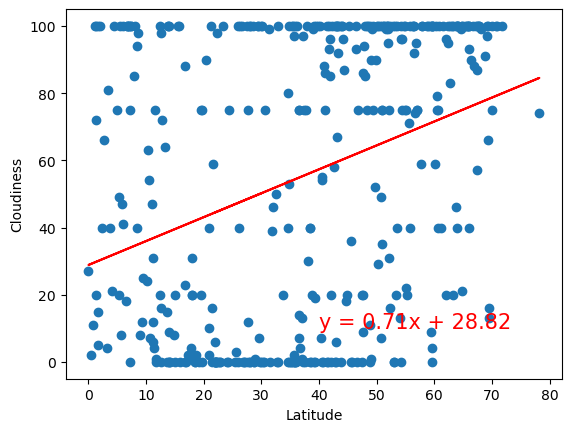

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

## Cloudiness vs Latitude (Northern Hemisphere)
Observation: The regression line has a steeper positive slope (y = 0.71x + 28.59), suggesting that cloudiness tends to increase with latitude in the Northern Hemisphere.

R-Value: r = 0.112, reflecting a weak correlation, albeit slightly stronger than in the Southern Hemisphere.

Conclusion: Cloudiness shows a slight upward trend with latitude in this region, but the relationship remains relatively weak.

The r-value is: 0.025415113125051073


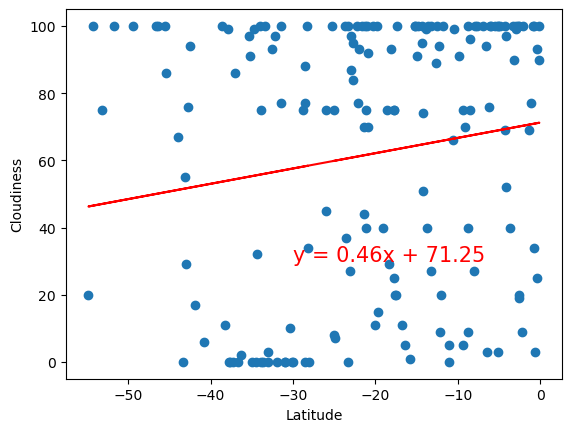

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

## Cloudiness vs Latitude (Southern Hemisphere)
Observation: The regression line has a positive slope (y = 0.63x + 71.68), indicating a slight increase in cloudiness as latitude moves closer to the equator in the Southern Hemisphere.

R-Value: r = 0.052, signifying a very weak correlation.

Conclusion: The connection between cloudiness and latitude is minimal and not strongly supported by the data.

The r-value is: 0.000763527124677137


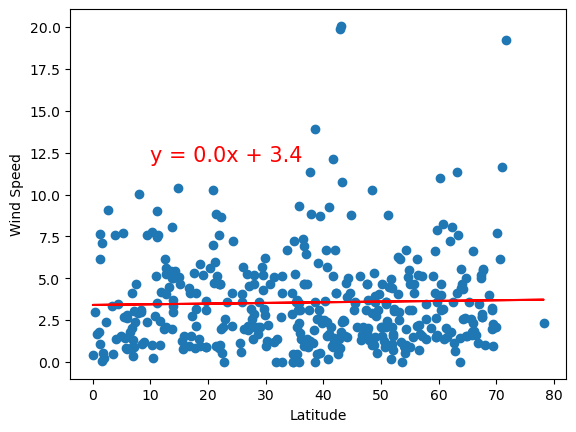

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

## Wind Speed vs Latitude (Northern Hemisphere)
Observation: The regression line displays a very slight positive slope (y = 0.02x + 2.94), suggesting a minimal increase in wind speed with latitude in the Northern Hemisphere.

R-Value: r = 0.023, reflecting an almost negligible correlation.

Conclusion: As in the Southern Hemisphere, latitude has little to no influence on wind speed in this region.

The r-value is: 0.0812381496822256


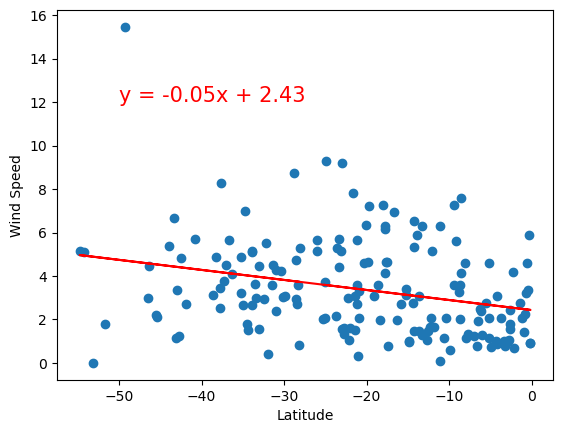

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

## Wind Speed vs Latitude (Southern Hemisphere)
Observation: The regression line shows a slight negative slope, suggesting a weak inverse relationship between wind speed and latitude in the Southern Hemisphere.

R-Value: r = 0.059, indicating a very weak correlation. This implies that latitude has little to no effect on wind speed in this region.

Conclusion: The data points are broadly dispersed, and the relationship between wind speed and latitude is not statistically significant.